# Collaboration and Competition - Trained agent using MDDPG

---

In this notebook, you will find a solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

The following code is adapted from the code that Udacity published as part of the Udacity's Deep reinforcement learning nanodegree, https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Trained Agent

In [5]:
# create the 2 RL agent object with 24 states and 2 actions
agents = [Agent(state_size, action_size, random_seed=0) 
          for i in range(num_agents)]

# # random agent
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

/Users/isabelle_zhang/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 7	Average Score: 0.00

/Users/isabelle_zhang/Box Sync/Deep RL/deep-reinforcement-learning/p3_collab-compet/ddpg_agent.py:111: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.01
Episode 300	Average Score: 0.03
Episode 400	Average Score: 0.05
Episode 500	Average Score: 0.07
Episode 600	Average Score: 0.09
Episode 700	Average Score: 0.15
Episode 800	Average Score: 0.20
Episode 900	Average Score: 0.29
Episode 1000	Average Score: 0.37
Episode 1100	Average Score: 0.35
Episode 1200	Average Score: 0.39
Episode 1300	Average Score: 0.49
Episode 1400	Average Score: 0.63
Episode 1500	Average Score: 0.55
Episode 1600	Average Score: 0.52
Episode 1700	Average Score: 0.67
Episode 1800	Average Score: 0.82
Episode 1879	Average Score: 0.91
Environment solved in 1779 episodes!	Average Score: 0.91


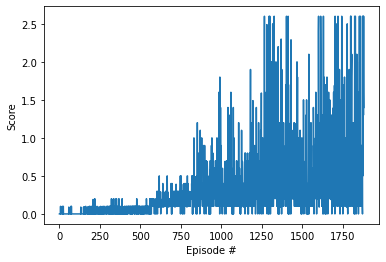

In [6]:
def maddpg(n_episodes=3000, max_t=10000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores_list = []
    for i_episode in range(1, n_episodes+1): # loop through episodes
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment  
        states = env_info.vector_observations                  # get the current state (for each agent)
        for agent in agents:
            agent.reset() # reset agent
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        for t in range(max_t): # loop through the time step
            actions = []
            for i, agent in enumerate(agents):
                actions.append(agent.act(states[i], add_noise=True)) # get action for each agent using their local observation
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            for i, agent in enumerate(agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], t, dones[i]) 
            states = next_states
            scores += env_info.rewards
            if np.any(dones): 
                break 
        scores_deque.append(np.max(scores))
        scores_list.append(np.max(scores))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        # if the average score over last 100 episode reaches 0.9+, then stop the training and save the weights
        if np.mean(scores_deque)>=0.9:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, 
                                                                                         np.mean(scores_deque)))
            # save the weights 
            for i, agent in enumerate(agents):
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor'+str(i+1)+'.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic'+str(i+1)+'.pth')

            break
    return scores_list

scores = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [6]:
env.close()

### 4. Watch a trained agent

In [6]:
# create the 2 RL agent object with 24 states and 2 actions
agents = [Agent(state_size, action_size, random_seed=0) for i in range(num_agents)]

# load the weights from trained model 
for i, agent in enumerate(agents):
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor'+str(i+1)+'.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic'+str(i+1)+'.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = []
    for i, agent in enumerate(agents):
        actions.append(agent.act(states[i], add_noise=False)) # get action for each agent
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.max(scores)))     

Total score (averaged over agents) this episode: 2.7000000402331352


In [7]:
env.close()